## Flight Fare Prediction

# Training Set

# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing Dataset

1. As the data is in the form of excel file(.xlsx extension), we have to use pandas read_excel to load the data.
2. Now we check complete information of data such as hidden values(null values in a row or column).
3. If null values are not present then we move further, and if present we can: 
   a) Impute data using imputation method in sklearn.
   b) Fill NaN values with mean, median or mode using fillna() method.
4. For statistical analysis we use, describe method.

In [2]:
#importing data
train_data = pd.read_excel(r"C:\Users\SOMAY\OneDrive\Desktop\Projects\Flight Fare Prediction\Data_Train.xlsx")

In [3]:
#getting first 5 rows from dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Preprocessing

In [4]:
#data type of any column(Date_of_Journey)
print(train_data.Date_of_Journey.dtype)

#data type of any column(Arrival_Time)
print(train_data.Arrival_Time.dtype)

#data type of any column(Dep_Time)
print(train_data.Dep_Time.dtype)

#data type of any column(Duration)
print(train_data.Duration.dtype)

object
object
object
object


In [5]:
#number of rows and columns in a dataset
train_data.shape

(10683, 11)

In [6]:
#information of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#checking number of missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
train_data.dropna(inplace=True)
#now check again
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#statistical analysis(description)
train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
#checking distribution of categorical data
print(train_data.Airline.value_counts(),"\n")
print(train_data.Source.value_counts(),"\n")
print(train_data.Destination.value_counts(),"\n")
print(train_data.Total_Stops.value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


# Exploratory Data Analysis(EDA)

1. From description of data, we can see that 'Date_of_Journey', 'Arrival_Time', 'Dep_Time' is of 'object' datatype, so we have to convert these into 'datetime' datatype so as to use this coloumn property for prediction.
2. For converting into 'datetime' datatype, we use pandas to_datetime

"Date_of_Journey" into datatime:
1. '.dt.day' will extract only 'day', '.dt.month' will extract only 'month' and '.dt.year' will extract only 'year'

In [11]:
#converting to 'datetime'
train_data['Date_of_Journey'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y')
#read first five rows
train_data.head()
#check type of coloumn(Date_of_Journey)
print(train_data.Date_of_Journey.dtype)

datetime64[ns]


In [12]:
#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)

#extracting day
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
#extracting month
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
#extracting year
#train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year

#print first 5 rows
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
#drop column 'Date_of_Journey' as it's of no use now
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


"Arrival_Time" and "Dep_Time" into datatime:

1.  Arrival time is when the plane pulls up to the gate.
2.  Departure time is when a plane leaves the gate. 
3. '.dt.hour' will extract only 'hour', '.dt.minute' will extract only 'minute' and '.dt.second' will extract only 'second'

In [14]:
#converting 'Arrival_Time' to 'datetime'
train_data['Arrival_Time'] = pd.to_datetime(train_data.Arrival_Time)
#read first five rows
train_data.head()
#check type of coloumn(Arrival_Time)
print(train_data.Arrival_Time.dtype)

datetime64[ns]


In [15]:
#adding new columns(Arrival_hour, Arrival_minute)

#extracting Arrival hour
train_data['Arrival_hour'] = train_data['Arrival_Time'].dt.hour
#extracting Arrival minute
train_data['Arrival_minute'] = train_data['Arrival_Time'].dt.minute

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2021-12-16 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2021-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2021-12-16 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2021-12-16 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [16]:
#drop column 'Arrival_Time' as it's of no use now
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


In [17]:
#converting 'Dep_Time' to 'datetime'
train_data['Dep_Time'] = pd.to_datetime(train_data.Dep_Time)
#read first five rows
train_data.head()
#check type of coloumn(Arrival_Time)
print(train_data.Dep_Time.dtype)

datetime64[ns]


In [18]:
#adding new columns(Dep_hour, Dep_minute)

#extracting Depature hour
train_data['Dep_hour'] = train_data['Dep_Time'].dt.hour
#extracting Departure minute
train_data['Dep_minute'] = train_data['Dep_Time'].dt.minute

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-12-16 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-12-16 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-12-16 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-12-16 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-12-16 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [19]:
#drop column 'Dep_Time' as it's of no use now
train_data.drop(['Dep_Time'], axis=1, inplace=True)

#print first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [20]:
#******************************************************

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time


# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [21]:
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
train_data['Duration_hours'] = duration_hours
train_data['Duration_minutes'] = duration_mins

#get first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [22]:
#drop column 'Duration' as it's of no use now
train_data.drop(['Duration'], axis=1, inplace=True)

#get first 5 rows 
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


# Handling Categorical Data

There are many ways to handle Categorical Data, some of them are:
1. 'LabelEncoder'--> for handling Ordinal Data (means, data which is in order)
1. 'OneHotEncoder'--> for handling Nominal Data (means, data which is not in order)

In [23]:
#checking distribution of categorical data(Airline)
print(train_data.Airline.value_counts(),"\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 



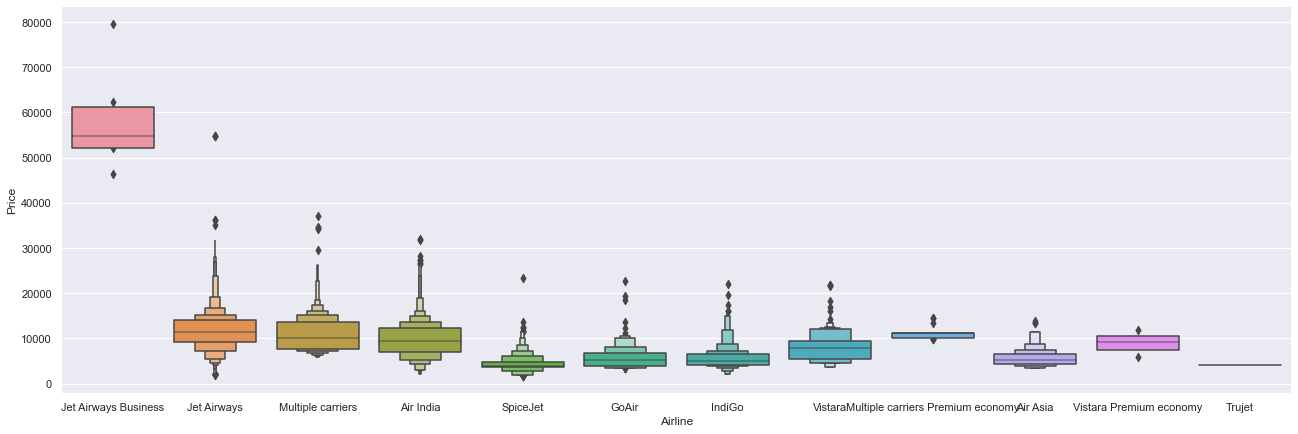

In [24]:
#Graph of Airline vs Price
sns.catplot(y='Price', x='Airline', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

# From graph we can see that 'Jet Airways Business' have the highest Price.
# Apart from the first Airline almost all are having similar 'median'.


In [25]:
#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#make a dataframe named 'Airline'
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
#get first 5 rows of Airline
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
#checking distribution of categorical data(Source)
print(train_data.Source.value_counts(),"\n")

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 



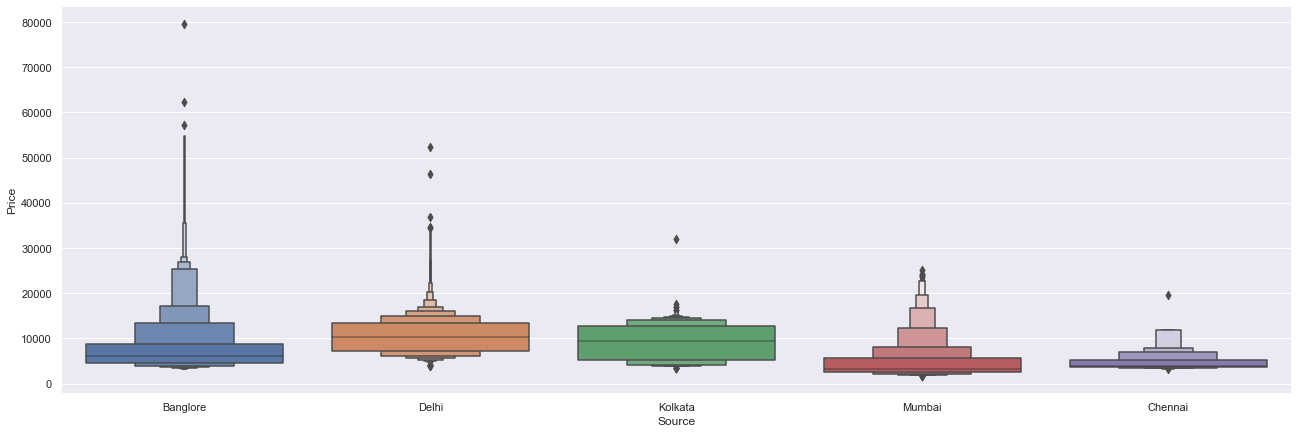

In [27]:
#Graph of Source vs Price
sns.catplot(y='Price', x='Source', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [28]:
#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#make a dataframe named 'Source'
Source = train_data['Source']
Source = pd.get_dummies(Source, drop_first=True)
#get first 5 rows of Source
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
#checking distribution of categorical data(Destination)
print(train_data.Destination.value_counts(),"\n")

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64 



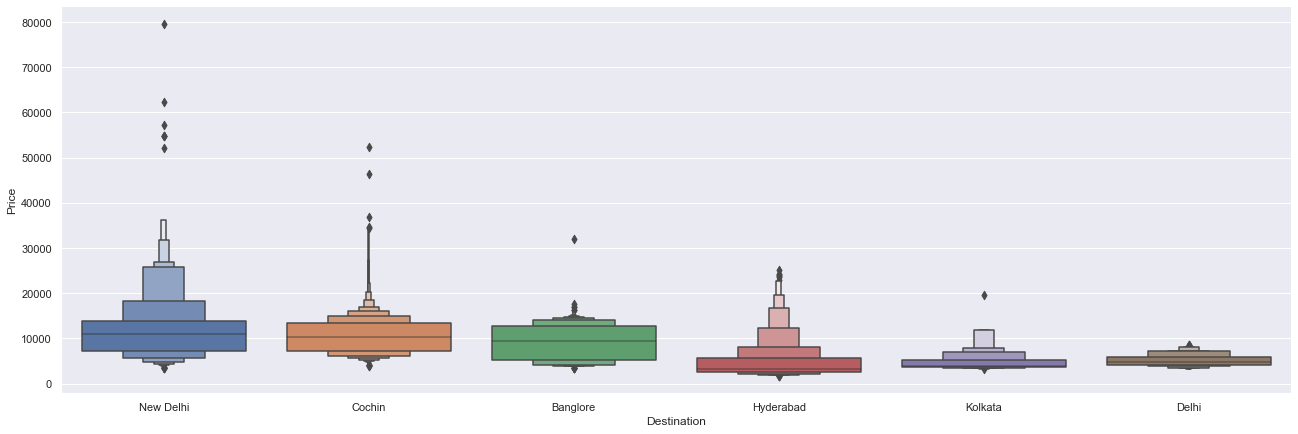

In [30]:
#Graph of Destination vs Price
sns.catplot(y='Price', x='Destination', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [31]:
#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'

#***********************why not banglore

#make a dataframe named 'Destination'
Destination = train_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
#get first 5 rows of Destination
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
#checking distribution of categorical data(Route)
train_data['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → COK → MAA → HYD                   1
CCU → VTZ → BLR                         1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → NDC → HYD                         1
CCU → IXZ → MAA → BLR                   1
Name: Route, Length: 128, dtype: int64

In [33]:
#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
train_data.drop(['Route'], axis=1, inplace=True)

#get first 5 rows
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [34]:
#checking distribution of categorical data(Total_Stops)
print(train_data.Total_Stops.value_counts(),"\n")

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64 



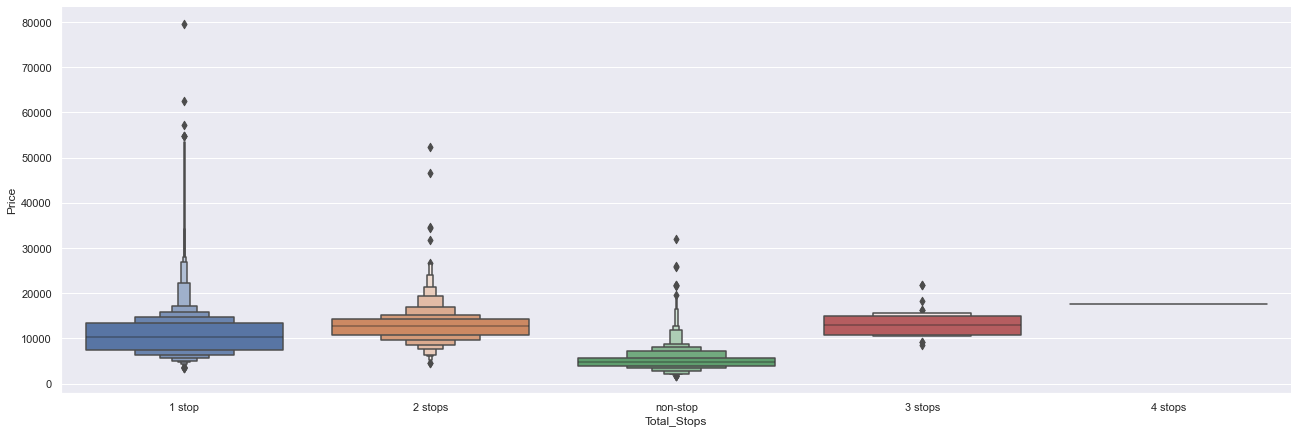

In [35]:
#Graph of Total_Stops vs Price
sns.catplot(y='Price', x='Total_Stops', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [36]:
#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.

train_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,4,45


In [37]:
#checking distribution of categorical data(Additional_Info)
print(train_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
train_data.drop(['Additional_Info'], axis=1, inplace=True)

#get first 5 rows
train_data.head()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64 



,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


In [38]:
#conactenate dataframe--> (train_data, Airline, Source, Destination)
train_data1 = pd.concat([train_data, Airline, Source, Destination], axis=1)

#print first 5 rows
train_data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [39]:
#drop columns 'Airline, Source, Destination' as these are now of no further use
train_data1.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
#print first 5 rows
train_data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [40]:
#shape of dataframe 'train_data'
train_data1.shape

(10682, 30)

# Test Set

In [41]:
# All steps as in 'Training Set' (its done separately so as to overcome 'data leakage')

#IMPORTING DATASET

#importing data
test_data = pd.read_excel(r"C:\Users\SOMAY\OneDrive\Desktop\Projects\Flight Fare Prediction\Test_set.xlsx")

#********************************************************************

#DATA PREPROCESSING

#number of rows and columns in a dataset
test_data.shape

#checking number of missing values
test_data.isnull().sum()

#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
test_data.dropna(inplace=True)
#now check again
test_data.isnull().sum()

#statistical analysis(description)
test_data.describe()

#********************************************************************

#EXPLORATORY DATA ANALYSIS

#converting to 'datetime'
test_data['Date_of_Journey'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y')

#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)
#extracting day
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day
#extracting month
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

#drop column 'Date_of_Journey' as it's of no use now
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

#converting 'Arrival_Time' to 'datetime'
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)

#adding new columns(Arrival_hour, Arrival_minute)
#extracting Arrival hour
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour
#extracting Arrival minute
test_data['Arrival_minute'] = test_data['Arrival_Time'].dt.minute

#drop column 'Arrival_Time' as it's of no use now
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

#converting 'Dep_Time' to 'datetime'
test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)

#adding new columns(Dep_hour, Dep_minute)
#extracting Depature hour
test_data['Dep_hour'] = test_data['Dep_Time'].dt.hour
#extracting Departure minute
test_data['Dep_minute'] = test_data['Dep_Time'].dt.minute

#drop column 'Dep_Time' as it's of no use now
test_data.drop(['Dep_Time'], axis=1, inplace=True)

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time

# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
test_data['Duration_hours'] = duration_hours
test_data['Duration_minutes'] = duration_mins

#drop column 'Duration' as it's of no use now
test_data.drop(['Duration'], axis=1, inplace=True)

#********************************************************************

#HANDLING CATEGORICAL DATA

#checking distribution of categorical data(Airline)
print(test_data.Airline.value_counts(),"\n")

#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Airline'
Airline = test_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

#checking distribution of categorical data(Source)
print(test_data.Source.value_counts(),"\n")

#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Source'
Source = test_data['Source']
Source = pd.get_dummies(Source, drop_first=True)

#checking distribution of categorical data(Destination)
print(test_data.Destination.value_counts(),"\n")

#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Destination'
Destination = test_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

#checking distribution of categorical data(Route)
test_data['Route'].value_counts()

#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
test_data.drop(['Route'], axis=1, inplace=True)

#checking distribution of categorical data(Total_Stops)
print(train_data.Total_Stops.value_counts(),"\n")

#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.
test_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
test_data.head()

#checking distribution of categorical data(Additional_Info)
print(test_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
test_data.drop(['Additional_Info'], axis=1, inplace=True)

#conactenate dataframe--> (train_data, Airline, Source, Destination)
test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)

#drop columns 'Airline, Source, Destination' as these are now of no further use
test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

#shape of dataframe 'train_data'
print(test_data.shape)

#check which two(30-28=2) columns are missing in 'test_data'
print(test_data.columns)
print(train_data.columns)


#print first 5 rows
test_data.head()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64 

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64 

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64 

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64 

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                 

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

We find out best features which will contribute and have good relations with target variable. Some methods for selection are following:
1. heatmap
2. feature_importances_
3. SelectKBest

In [42]:
#number of rows and columns in 'train_data'.
train_data1.shape

(10682, 30)

In [43]:
#name of all the columns of 'train_data'
train_data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [44]:
#divide 'tarin_data' into 'X=independent feature(columns)' and 'Y=dependent/target feature'
X = train_data1.drop(['Price'], axis=1)
Y = train_data1['Price']

#print X and Y
X.head()
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

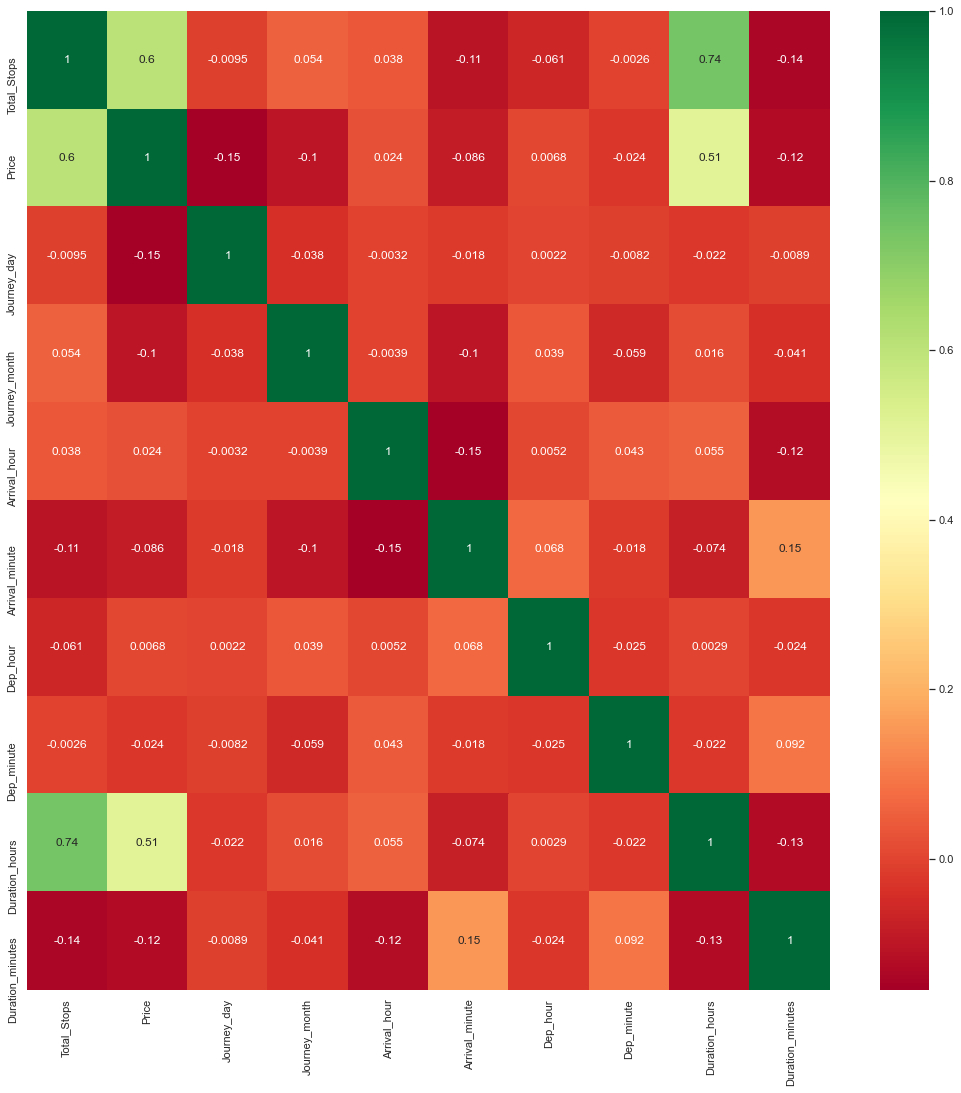

In [45]:
#find relation between independent and dependent attributes
#heatmap ************(learn it)

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [46]:
#extracting important features using 'ExtraTreesRegressor'

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [47]:
#selection_importances_
print(select.feature_importances_)

[2.23265690e-01 1.43770343e-01 5.41217661e-02 2.73959190e-02
 1.94213453e-02 2.38294461e-02 2.13697829e-02 1.20461694e-01
 1.80337472e-02 1.00491018e-02 1.72432193e-03 1.78063457e-02
 1.37461584e-01 6.77448465e-02 1.98837072e-02 9.45112554e-04
 2.81771761e-03 1.11088060e-04 5.11142070e-03 8.56318230e-05
 4.28600617e-04 8.80344671e-03 3.49368510e-03 7.77242933e-03
 1.54714263e-02 1.61783931e-02 7.10193268e-03 5.61899682e-04
 2.47775740e-02]


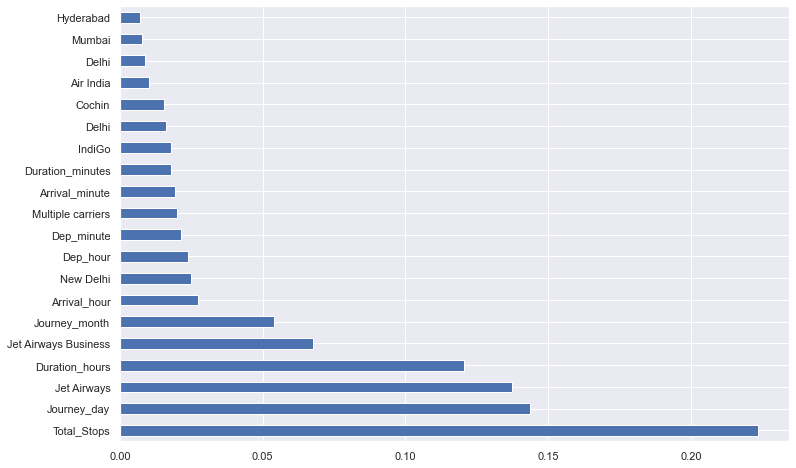

In [48]:
#plot graph of 'feature_importances_' for better visualization

plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Model Using Random Forest

1. Split data into train and test so as to predict w.r.t. 'X_test'.
2. If needed do scaling of data
   a) *scaling is not done in Random Forest*
3. Import the model(which suits the data most or gives better results)
4. Fit training data into it
5. Predict w.r.t. 'X_test' (compare with 'Y_test')
6. In regression models check **RMSE** score
7. Plot final graphs

 

In [49]:
#import 'train_test_split' 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
#import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor
#abbrevate
RF_reg = RandomForestRegressor()
#fit training data into model
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [51]:
#predict Y using 'X_test'
Y_pred = RF_reg.predict(X_test)

In [52]:
#for training set
RF_reg.score(X_train, Y_train)

0.9527457653653982

In [53]:
#for testing set
RF_reg.score(X_test, Y_test)

0.797737049425581

C:\Users\SOMAY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


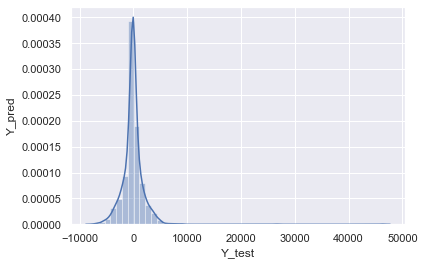

In [54]:
#plot between 'Y_test' and 'Y_pred'
sns.distplot(Y_test-Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

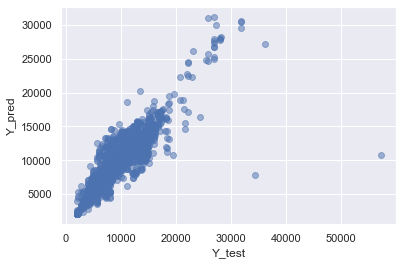

In [55]:
#scatter plot between 'Y_test' and 'Y_pred'
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [56]:
#import metrics
from sklearn import metrics

# calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1175.111131716669
MSE: 4361205.132576774
RMSE: 2088.3498587585304


In [57]:
# calculate RMSE/(max(DV)-min(DV))
rmse/(max(Y)-min(Y))

0.026858768906132632

In [58]:
# calculate r2_score
r2 = metrics.r2_score(Y_test, Y_pred)
print(r2)

0.797737049425581


In [63]:
import joblib
import pickle

In [71]:
with open('pickle_RF_reg','wb') as file:
    pickle.dump(RF_reg,file)
  